In [14]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [15]:
# Definir variables simbolicas
x, y, z, w, u, v = sp.var('x y z w u v')

### Clase de metodo hessiano

In [16]:
class Hessian_Method:
    def __init__(self, expression, variables):
        self.expression = expression
        self.variables = variables
        self.grad = [sp.diff(expression, var) for var in self.variables]
        self.H = sp.hessian(expression, self.variables)
        self.critical_points = sp.solve(self.grad, self.variables, dict=True)
        
    def determinants(self):
        for point in self.critical_points:
            H_sub = self.H.subs(point)
            dets = [H_sub[:i, :i].det() for i in range(1, H_sub.rows + 1)]
        return dets
        
    def evaluate_points(self):
        results = []

        for point in self.critical_points:
            H_sub = self.H.subs(point)
            dets = [H_sub[:i, :i].det() for i in range(1, H_sub.rows + 1)]

            if all(x > 0 for x in dets):
                results.append((point, "minimo local"))
            elif all(x < 0 for x in dets):
                results.append((point, "maximo local"))
            elif all(x == 0 for x in dets):
                results.append((point, "no se puede determinar"))
            else:
                results.append((point, "punto de silla"))
        return results

    def get_all_parameters(self):
        print(
            f"Function: {self.expression}\nGrad: {self.grad}\nCritical Points: {self.critical_points}\nDeterminantes: {self.determinants()}"
        )
        display(self.H)
        return None

### Funciones para graficar

In [17]:
def plot_3d(func, x_range=(-10, 10), y_range=(-10, 10), resolution=100):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.set_ylabel("Y")
    ax.set_xlabel("X")

    ax.plot_surface(X, Y, Z, cmap="viridis")

def plot_2d(func, x_range=(-10, 10), resolution=100):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = func(x)
    
    plt.figure()
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('2D Plot')
    plt.grid(True)
    plt.show()

## Parte 1
Resolver de forma analitica y computacional (Python) los siguientes ejercicios para encontrar los puntos maximos, minimos o puntos de silla

### a)

In [18]:
f_1 = 8 * x**3 + 4 * y**2


def func_1(x, y):
    return 8 * x**3 + 4 * y**2

hessian_method_1 = Hessian_Method(f_1, (x, y))
hessian_method_1.get_all_parameters()
hessian_method_1.evaluate_points()

Function: 8*x**3 + 4*y**2
Grad: [24*x**2, 8*y]
Critical Points: [{x: 0, y: 0}]
Determinantes: [0, 0]


Matrix([
[48*x, 0],
[   0, 8]])

[({x: 0, y: 0}, 'no se puede determinar')]

### b)

Function: 8*x**3 + 4*x*y**2 - 16*x - 12*y
Grad: [24*x**2 + 4*y**2 - 16, 8*x*y - 12]
Critical Points: [{x: -(-6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)*(-2 - 6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)*(-6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 + 2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)/9, y: -6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2}, {x: -(-6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 + 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)*(-2 - 6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 + 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)*(-6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 + 2 + 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)/9, y: -6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 + 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2}, {x: -(6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)*(-2 + 6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)*(6**(3/4)*cos(atan(sqrt(38)/4)/2)/2 + 2 - 6**(3/4)*I*sin(atan(sqrt(38)/4)/2)/2)/9,

Matrix([
[48*x, 8*y],
[ 8*y, 8*x]])

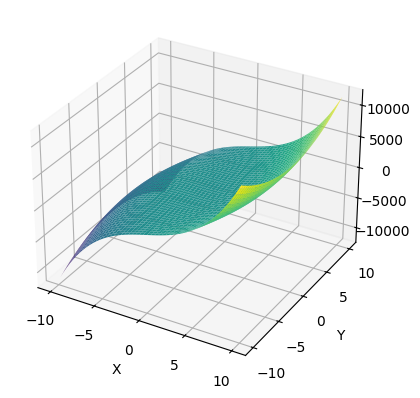

In [19]:
f_2 = 8 * x**3 + 4 * x * y**2 - 16 * x - 12 * y


def func_2(x, y):
    return 8 * x**3 + 4 * x * y**2 - 16 * x - 12 * y

hessian_method_2 = Hessian_Method(f_2, (x, y))
hessian_method_2.get_all_parameters()
plot_3d(func_2)

### c)

In [20]:
f_3 = 2*x**2 + 2*y**2 + 2*z**2 + 4*x - x*y - 6*z

hessian_method_3 = Hessian_Method(f_3, (x, y, z))
hessian_method_3.get_all_parameters()

Function: 2*x**2 - x*y + 4*x + 2*y**2 + 2*z**2 - 6*z
Grad: [4*x - y + 4, -x + 4*y, 4*z - 6]
Critical Points: [{x: -16/15, y: -4/15, z: 3/2}]
Determinantes: [4, 15, 60]


Matrix([
[ 4, -1, 0],
[-1,  4, 0],
[ 0,  0, 4]])

### d)

Function: 18*x**2 - 16*x + 2*y**2 - 15*y
Grad: [36*x - 16, 4*y - 15]
Critical Points: [{x: 4/9, y: 15/4}]
Determinantes: [36, 144]


Matrix([
[36, 0],
[ 0, 4]])

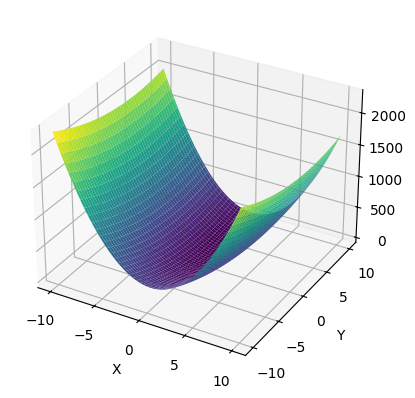

In [27]:
f_4 = 18*x**2 + 2*y**2 - 16*x - 15*y
func_4 = lambda x, y: 18*x**2 + 2*y**2 - 16*x - 15*y

hessian_method_4 = Hessian_Method(f_4, (x, y))
hessian_method_4.get_all_parameters()
hessian_method_4.evaluate_points()

plot_4 = plot_3d(func_4)

## Parte 2

### a)

In [22]:
f_5 = 10*x**3 + 20*x**2 + 0.5*y**2 + 2*z**2 - x*y + x - 2*z + 0.5*w**2 + 2*w

hessian_method_5 = Hessian_Method(f_5, (x, y, z, w))
hessian_method_5.get_all_parameters()
hessian_method_5.evaluate_points()

Function: 0.5*w**2 + 2*w + 10*x**3 + 20*x**2 - x*y + x + 0.5*y**2 + 2*z**2 - 2*z
Grad: [30*x**2 + 40*x - y + 1, -x + 1.0*y, 4*z - 2, 1.0*w + 2]
Critical Points: [{w: -2.00000000000000, x: -1.27383224240710, y: -1.27383224240710, z: 0.500000000000000}, {w: -2.00000000000000, x: -0.0261677575929033, y: -0.0261677575929033, z: 0.500000000000000}]
Determinantes: [38.4299345444258, 37.4299345444258, 149.719738177703, 149.719738177703]


Matrix([
[60*x + 40,  -1, 0,   0],
[       -1, 1.0, 0,   0],
[        0,   0, 4,   0],
[        0,   0, 0, 1.0]])

[({w: -2.00000000000000,
   x: -1.27383224240710,
   y: -1.27383224240710,
   z: 0.500000000000000},
  'maximo local'),
 ({w: -2.00000000000000,
   x: -0.0261677575929033,
   y: -0.0261677575929033,
   z: 0.500000000000000},
  'minimo local')]

### b)

In [23]:
f_6 = -15*x**3 + 30*x**2 + 0.2**2 + 2*z**2 - x*y + x -2*z + 0.3*w**2 + w

hessian_method_6 = Hessian_Method(f_6, (x, y, z, w))
hessian_method_6.get_all_parameters()
hessian_method_6.evaluate_points()

Function: 0.3*w**2 + w - 15*x**3 + 30*x**2 - x*y + x + 2*z**2 - 2*z + 0.04
Grad: [-45*x**2 + 60*x - y + 1, -x, 4*z - 2, 0.6*w + 1]
Critical Points: [{w: -1.66666666666667, x: 0.0, y: 1.00000000000000, z: 0.500000000000000}]
Determinantes: [60, -1, -4, -2.40000000000000]


Matrix([
[60 - 90*x, -1, 0,   0],
[       -1,  0, 0,   0],
[        0,  0, 4,   0],
[        0,  0, 0, 0.6]])

[({w: -1.66666666666667, x: 0.0, y: 1.00000000000000, z: 0.500000000000000},
  'punto de silla')]

### c)

In [24]:
f_7 = 2*x**3 + 20*x**2 + 0.5*y**2 + 2*z**2 - x*y + x -2*z + 0.5*w**2 + 2*w - 0.3*u**2 + 0.1*v**2 + 3*u*v

hessian_method_6 = Hessian_Method(f_7, (x, y, z, w, u, v))
hessian_method_6.get_all_parameters()
hessian_method_6.evaluate_points()

Function: -0.3*u**2 + 3*u*v + 0.1*v**2 + 0.5*w**2 + 2*w + 2*x**3 + 20*x**2 - x*y + x + 0.5*y**2 + 2*z**2 - 2*z
Grad: [6*x**2 + 40*x - y + 1, -x + 1.0*y, 4*z - 2, 1.0*w + 2, -0.6*u + 3*v, 3*u + 0.2*v]
Critical Points: [{u: 0.0, v: 0.0, w: -2.00000000000000, x: -6.47425702035885, y: -6.47425702035885, z: 0.500000000000000}, {u: 0.0, v: 0.0, w: -2.00000000000000, x: -0.0257429796411494, y: -0.0257429796411494, z: 0.500000000000000}]
Determinantes: [39.6910842443062, 38.6910842443062, 154.764336977225, 154.764336977225, -92.8586021863349, -1411.45075323229]


Matrix([
[12*x + 40,  -1, 0,   0,    0,   0],
[       -1, 1.0, 0,   0,    0,   0],
[        0,   0, 4,   0,    0,   0],
[        0,   0, 0, 1.0,    0,   0],
[        0,   0, 0,   0, -0.6,   3],
[        0,   0, 0,   0,    3, 0.2]])

[({u: 0.0,
   v: 0.0,
   w: -2.00000000000000,
   x: -6.47425702035885,
   y: -6.47425702035885,
   z: 0.500000000000000},
  'punto de silla'),
 ({u: 0.0,
   v: 0.0,
   w: -2.00000000000000,
   x: -0.0257429796411494,
   y: -0.0257429796411494,
   z: 0.500000000000000},
  'punto de silla')]